In [1]:
import pandas as pd
import sklearn
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv("mushroom_overload.csv")
df.head()

/tmp/ipykernel_6274/2906292201.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("mushroom_overload.csv")


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,17.18,f,g,e,f,e,NaN,w,18.58,...,s,y,w,u,w,t,g,NaN,d,a
1,p,15.30,x,h,e,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.94,f,h,o,f,e,NaN,w,16.84,...,s,y,w,u,w,t,p,NaN,d,a
3,p,13.37,f,g,e,f,e,NaN,w,18.10,...,s,y,w,u,w,t,g,NaN,d,u
4,p,17.23,x,h,e,f,e,NaN,w,17.42,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
def get_info(dataframe: pd.core.frame.DataFrame):
    
    """
    This function takes a dataframe as input and
    returns a short summary.
    """
    print(f"Total Records: {dataframe.shape[0]}")
    print(f"Total Features: {dataframe.shape[1]}")
    print(f"Total Duplicate Records: {dataframe.duplicated().sum()}")
    info = PrettyTable()
    info.field_names = ['Column', 
                        'Data Type', 
                        'Missing Values', 
                        'Missing Percentage', 
                        'Unique Values', 
                       'Percentage Unique']
    
    for column in dataframe.columns:
        
        data_type = dataframe[column].dtypes
        missing_values = dataframe[column].isnull().sum()
        missing_percentage = np.round(100 * dataframe[column].isnull().sum() / len(dataframe), 2)
        unique_values = dataframe[column].nunique()
        percentage_unique = np.round(100 * dataframe[column].nunique() / len(dataframe), 2)
        
        info.add_row([column, data_type, missing_values, missing_percentage, unique_values, percentage_unique])
    
    print(info)
get_info(df)

Total Records: 6723116
Total Features: 21
Total Duplicate Records: 0
+----------------------+-----------+----------------+--------------------+---------------+-------------------+
|        Column        | Data Type | Missing Values | Missing Percentage | Unique Values | Percentage Unique |
+----------------------+-----------+----------------+--------------------+---------------+-------------------+
|        class         |   object  |       0        |        0.0         |       2       |        0.0        |
|     cap-diameter     |  float64  |       0        |        0.0         |      5408     |        0.08       |
|      cap-shape       |   object  |       0        |        0.0         |       7       |        0.0        |
|     cap-surface      |   object  |    1579337     |       23.49        |       11      |        0.0        |
|      cap-color       |   object  |       0        |        0.0         |       12      |        0.0        |
| does-bruise-or-bleed |   object  |       

In [4]:
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        convert=df[i] = le.fit_transform(df[i])

<Axes: >

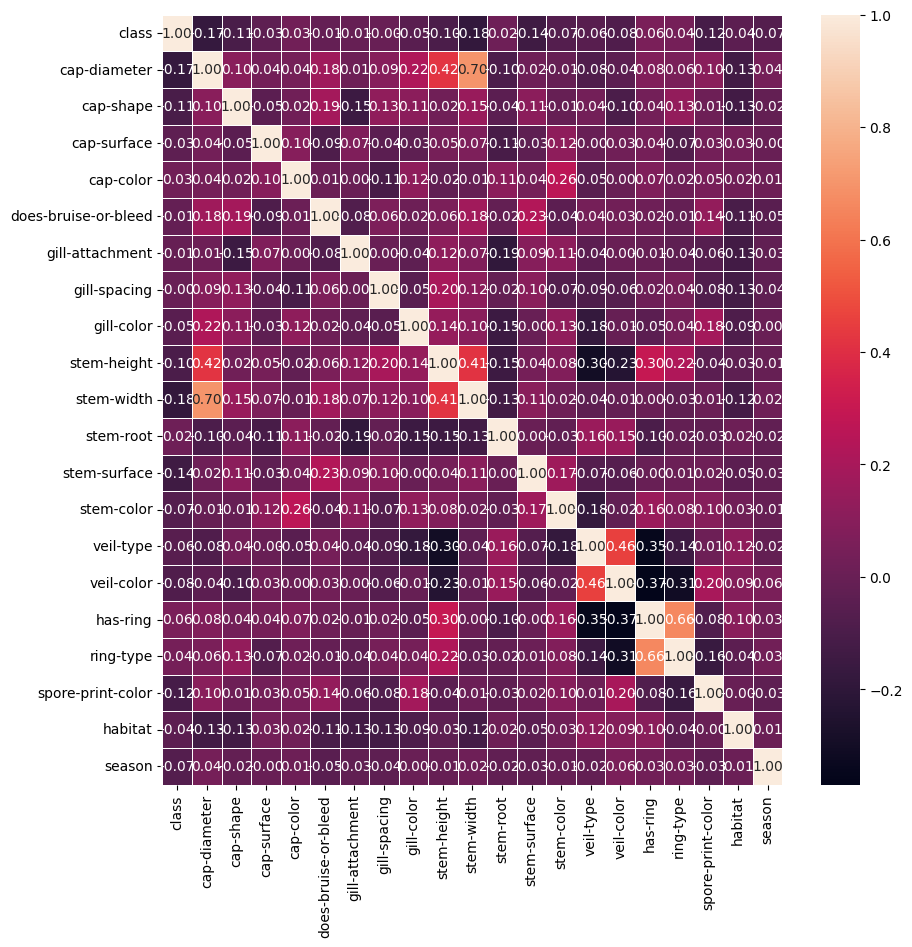

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),linewidth=.5,annot=True,fmt='0.2f')

In [6]:
from sklearn.preprocessing import MinMaxScaler
x=df.iloc[:,1:]
y=df.iloc[:,0]

scaler=MinMaxScaler()
x=scaler.fit_transform(df)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,stratify=y)

LogisticRegression()
accuracy is :    1.0 recall is :     1.0 f1Score is :     1.0


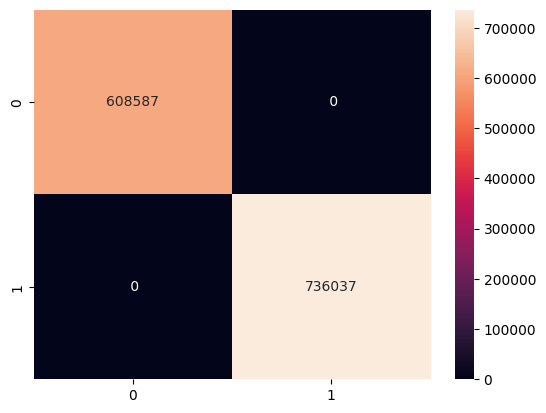

In [7]:
model = LogisticRegression()

model.fit(x_train, y_train)
pre=model.predict(x_test)
accuracy=accuracy_score(pre,y_test)
recall=recall_score(pre,y_test)
f1=f1_score(pre,y_test)

sns.heatmap(confusion_matrix(pre,y_test),annot=True,fmt="2g")
print(model)
print('accuracy is :   ',accuracy,'recall is :    ',recall,'f1Score is :    ',f1)